# TODOs

* Behavioral analyses on mice & simulations
* Total rewards (only first 600 trials per session)
* Update plots like comments in overleaf
* New model with just one value (pos = right; neg = left): because it's so symmetric anyway; might save updating two values
* Save NLL / AIC for each dataset -> do stats

# Imports

In [18]:
import plotnine as gg
# import datetime
# import glob
# import matplotlib.pyplot as plt
# plt.style.use('seaborn-colorblind')  # https://matplotlib.org/users/style_sheets.html
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os
import pandas as pd
# from pandas.plotting import scatter_matrix
# from scipy import stats
# from sklearn import manifold, decomposition, preprocessing
# import seaborn as sns
# import time

# from AlienTask import Task
# from shared_aliens import update_Qs_sim, get_alien_paths, get_alien_initial_q,\
#     get_summary_initial_learn, get_summary_cloudy, simulate_competition_phase, simulate_rainbow_phase, get_summary_rainbow,\
#     read_in_human_data, se

# Directories

In [19]:
base_dir = 'C:/Users/maria/MEGAsync/SLCN'
param_dir = os.path.join(base_dir, 'PShumanData/fitting/map_indiv/mice')
plot_save_dir = os.path.join(base_dir, 'models/plots/')

# Plot model fits

In [20]:
model_fits = pd.read_csv(os.path.join(param_dir, 'plots', 'modelwise_LLS.csv'))
model_fits = model_fits.sort_values(by=['WAIC']).reset_index(drop=True)
model_fits

,model_name,slope_variable,n_subj,WAIC,NLL,AIC
0,RLabcpnxd,age_z,439,198770.343750,96312.171875,198770.343750
1,RLabnp2d,age_z,439,198828.453125,96780.226562,198828.453125
2,RLabcpnx,age_z,439,200821.515625,97776.757812,200821.515625
3,RLabnp2,age_z,439,201033.734375,98321.867188,201033.734375
4,RLabcpnd,age_z,439,203626.046875,99179.023438,203626.046875
5,RLabcpd,age_z,439,203957.437500,99783.718750,203957.437500
6,RLabcpn,age_z,439,205034.734375,100322.367188,205034.734375
7,RLabcp,age_z,439,205293.953125,100890.976562,205293.953125
8,RLabcd,age_z,439,209405.000000,102946.500000,209405.000000
9,RLabc,age_z,439,211468.078125,104417.039062,211468.078125


In [21]:
winning_model_name = model_fits[model_fits.WAIC == np.min(model_fits.WAIC)].model_name.values[0]
winning_model_name

'RLabcpnxd'

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/WAICs.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


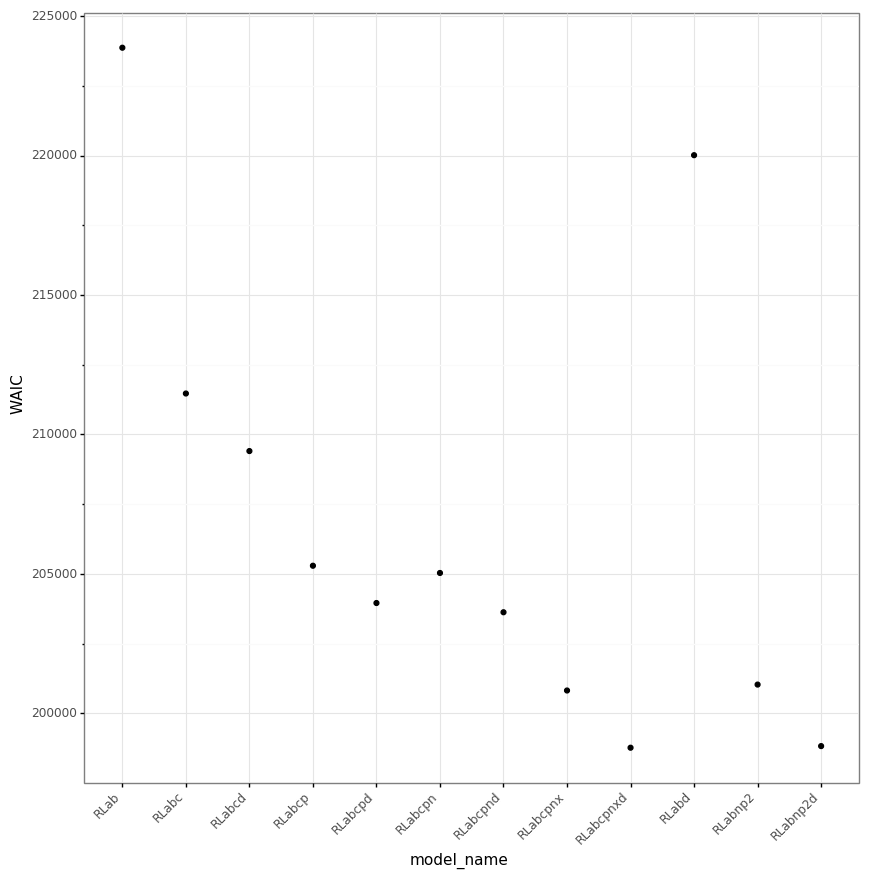

In [24]:
g = (gg.ggplot(model_fits, gg.aes('model_name', 'WAIC'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
)
g.draw()
g.save(os.path.join(plot_save_dir, 'WAICs.png'))

# Load fitted parameters

In [6]:
all_params = pd.DataFrame()
for file in os.listdir(param_dir):
    if ('csv' in file) and ('nll' not in file):
        new_params = pd.read_csv(os.path.join(param_dir, file))
        all_params = all_params.append(new_params)
all_params.beta /= 15
all_params['age_group'] = ['adult' if treatment == 1 else 'juvenile' for treatment in all_params.treatment]
all_params

,Gender,PDS,PreciseYrs,T1,age_z,alpha,animal,beta,bias,calpha,...,fullID,m,model,nalpha,persev,sID,session,slope_variable,treatment,age_group
0,Male,0,40,0,-1.052498,0.557125,14,0.266585,-0.012593,0.995924,...,1404012,0.0,RLabcd,0.557125,0.0,1404012,0,age_z,2,juvenile
1,Male,0,41,0,-0.997847,0.746814,14,0.217789,-0.118875,0.526867,...,1404112,0.0,RLabcd,0.746814,0.0,1404112,1,age_z,2,juvenile
2,Male,0,42,0,-0.943196,0.787453,14,0.176817,-0.215120,0.996565,...,1404212,0.0,RLabcd,0.787453,0.0,1404212,2,age_z,2,juvenile
3,Male,0,43,0,-0.888545,0.832710,14,0.391933,0.021604,0.991393,...,1404312,0.0,RLabcd,0.832710,0.0,1404312,3,age_z,2,juvenile
4,Male,0,44,0,-0.833894,0.714294,14,0.318971,-0.028560,0.487630,...,1404412,0.0,RLabcd,0.714294,0.0,1404412,4,age_z,2,juvenile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,Female,0,85,0,1.406801,0.815964,13,0.282976,NaN,0.000000,...,1308521,0.0,RLab,0.815964,0.0,1308521,11,age_z,1,adult
435,Female,0,86,0,1.461452,0.757556,13,0.333727,NaN,0.000000,...,1308621,0.0,RLab,0.757556,0.0,1308621,12,age_z,1,adult
436,Female,0,88,0,1.570754,0.653824,13,0.234867,NaN,0.000000,...,1308821,0.0,RLab,0.653824,0.0,1308821,13,age_z,1,adult
437,Female,0,89,0,1.625405,0.791032,13,0.342726,NaN,0.000000,...,1308921,0.0,RLab,0.791032,0.0,1308921,14,age_z,1,adult


In [7]:
parameter_colnames = ['alpha', 'beta', 'calpha', 'cnalpha', 'm', 'nalpha', 'persev']
animal_colnames = ['Gender', 'PDS', 'PreciseYrs', 'T1', 'age_z', 'animal', 'fullID', 'sID', 'session', 'treatment', 'age_group']
all_params_long = pd.melt(all_params, id_vars=animal_colnames + ['model', 'slope_variable'],
                          var_name='param_name', value_name='param_value')
all_params_long = all_params_long[all_params_long.param_value != 0]
all_params_long

,Gender,PDS,PreciseYrs,T1,age_z,animal,fullID,sID,session,treatment,age_group,model,slope_variable,param_name,param_value
0,Male,0,40,0,-1.052498,14,1404012,1404012,0,2,juvenile,RLabcd,age_z,alpha,0.557125
1,Male,0,41,0,-0.997847,14,1404112,1404112,1,2,juvenile,RLabcd,age_z,alpha,0.746814
2,Male,0,42,0,-0.943196,14,1404212,1404212,2,2,juvenile,RLabcd,age_z,alpha,0.787453
3,Male,0,43,0,-0.888545,14,1404312,1404312,3,2,juvenile,RLabcd,age_z,alpha,0.832710
4,Male,0,44,0,-0.833894,14,1404412,1404412,4,2,juvenile,RLabcd,age_z,alpha,0.714294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41700,Female,0,85,0,1.406801,13,1308521,1308521,11,1,adult,RLabnp2,age_z,persev,0.513943
41701,Female,0,86,0,1.461452,13,1308621,1308621,12,1,adult,RLabnp2,age_z,persev,0.464504
41702,Female,0,88,0,1.570754,13,1308821,1308821,13,1,adult,RLabnp2,age_z,persev,0.476513
41703,Female,0,89,0,1.625405,13,1308921,1308921,14,1,adult,RLabnp2,age_z,persev,0.315260


# Plot winning model

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/ParamsAge.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


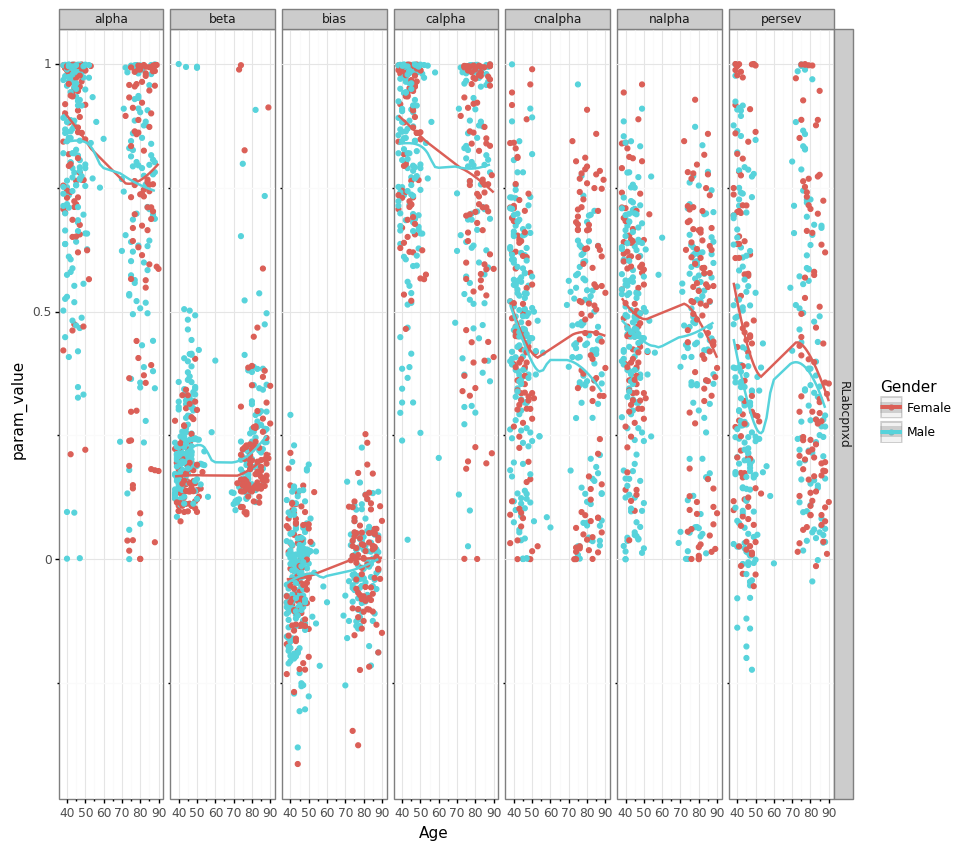

In [26]:
# gg.options.fig_size = (10, 10)
gg.options.figure_size = (10, 10)
win_mod_sub = all_params_long.model == winning_model_name
g = (gg.ggplot(all_params_long[win_mod_sub], gg.aes('PreciseYrs', 'param_value', color='Gender'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.geom_smooth()
 + gg.facet_grid('model~param_name')
 + gg.labs(x='Age')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'ParamsAge.png'))

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/ParamsSession.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


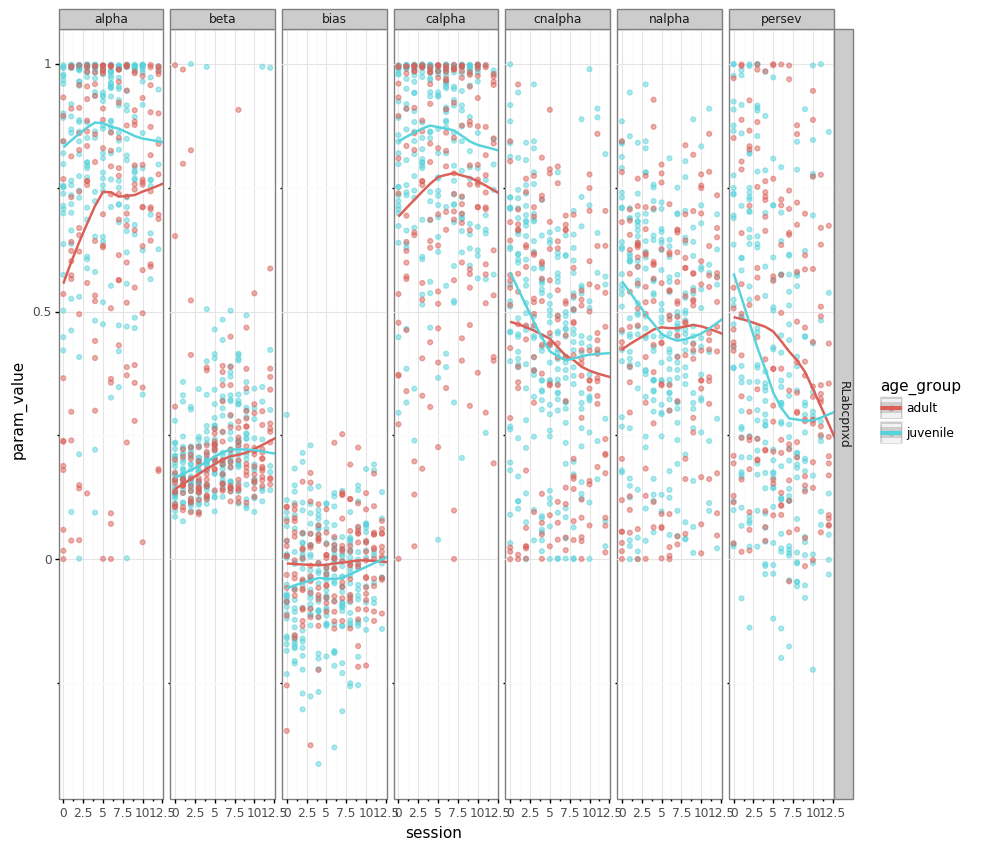

In [27]:
g = (gg.ggplot(all_params_long[win_mod_sub], gg.aes('session', 'param_value', color='age_group'))
 + gg.geom_point(alpha=0.5)
 + gg.theme_bw()
 + gg.geom_smooth()
 + gg.coord_cartesian(xlim=(0, 12))
 + gg.facet_grid('model~param_name')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'ParamsSession.png'))

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/ParamsAgegroup.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


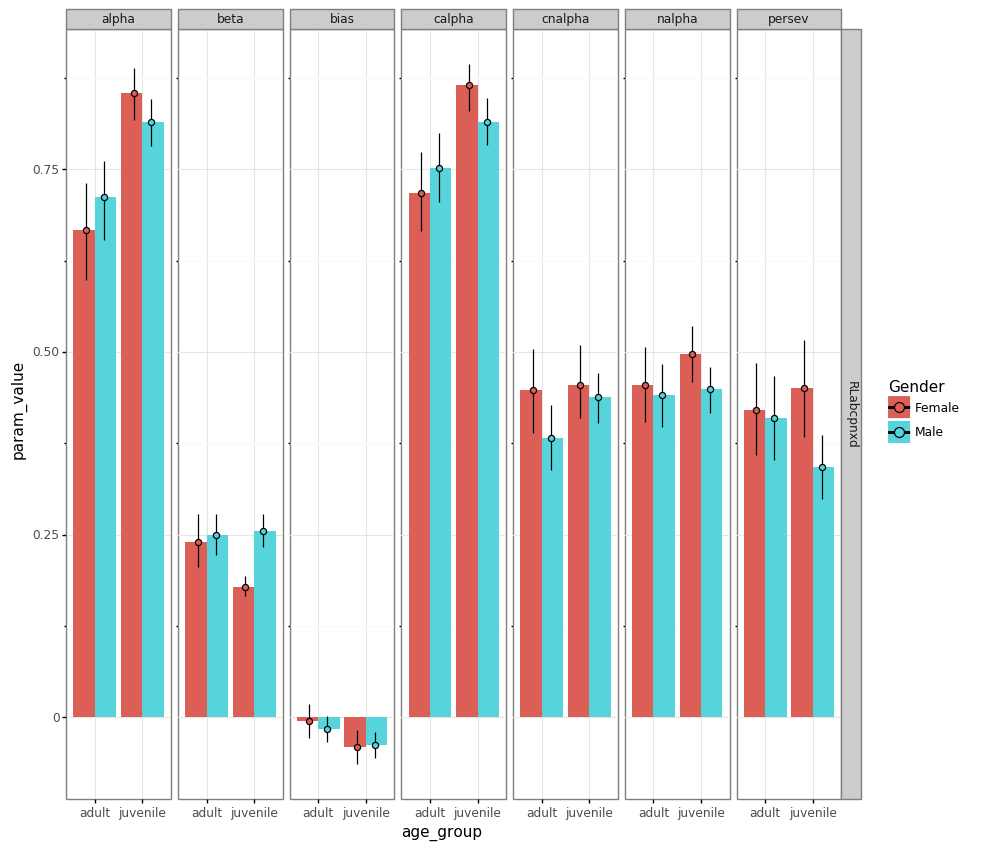

In [28]:
g = (gg.ggplot(all_params_long[win_mod_sub],
           gg.aes('age_group', 'param_value', fill='Gender'))
 + gg.stat_summary(geom='bar', position=gg.position_dodge)
 + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.75))
 + gg.theme_bw()
 + gg.facet_grid('model~param_name')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'ParamsAgegroup.png'))

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/BiasSession.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


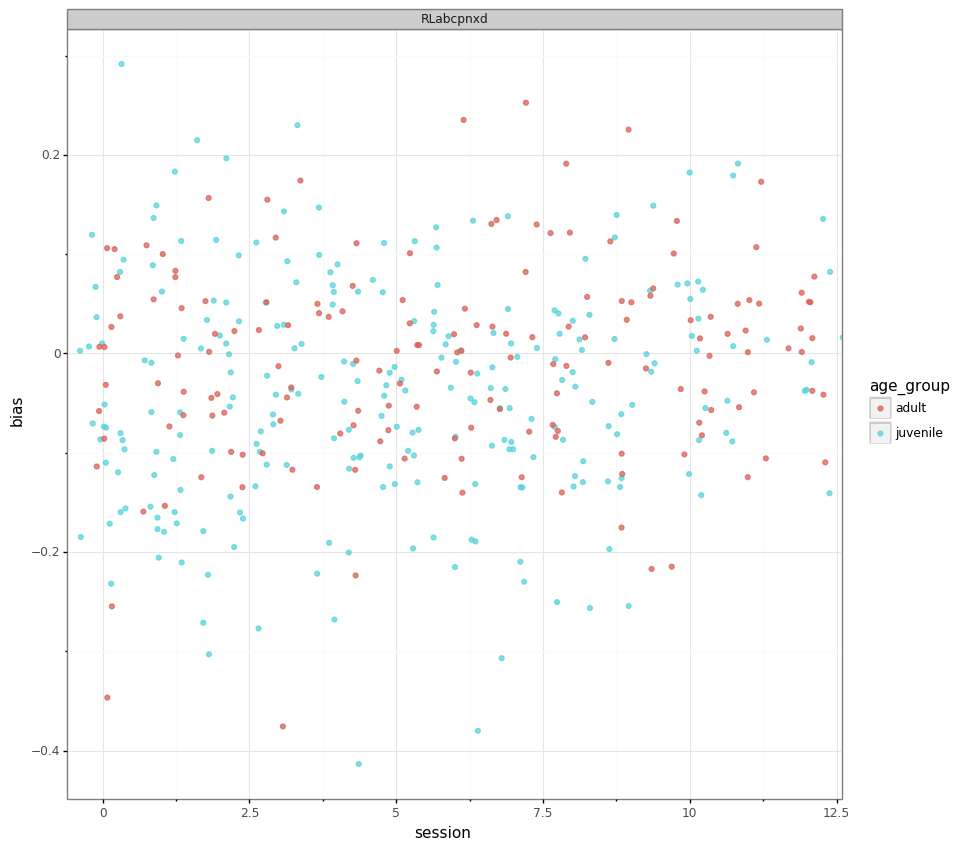

In [29]:
win_mod_sub_ = all_params.model == winning_model_name
g = (gg.ggplot(all_params[win_mod_sub_], gg.aes('session', 'bias', color='age_group'))
 + gg.geom_jitter(alpha=0.75)
 + gg.theme_bw()
 + gg.facet_grid('~model')
 + gg.coord_cartesian(xlim=(0, 12))
)
g.draw()
g.save(os.path.join(plot_save_dir, 'BiasSession.png'))

In [12]:
ql = 0.5
qr = 0.7
bias = -1
beta = 5
pr = 1 / (1 + np.exp(beta * (ql - qr - bias)))
pr

0.01798620996209156

# Plot all models

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\utils.py:634: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(lst, axis=axis, ignore_index=True)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_point : Removed 2634 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anacon

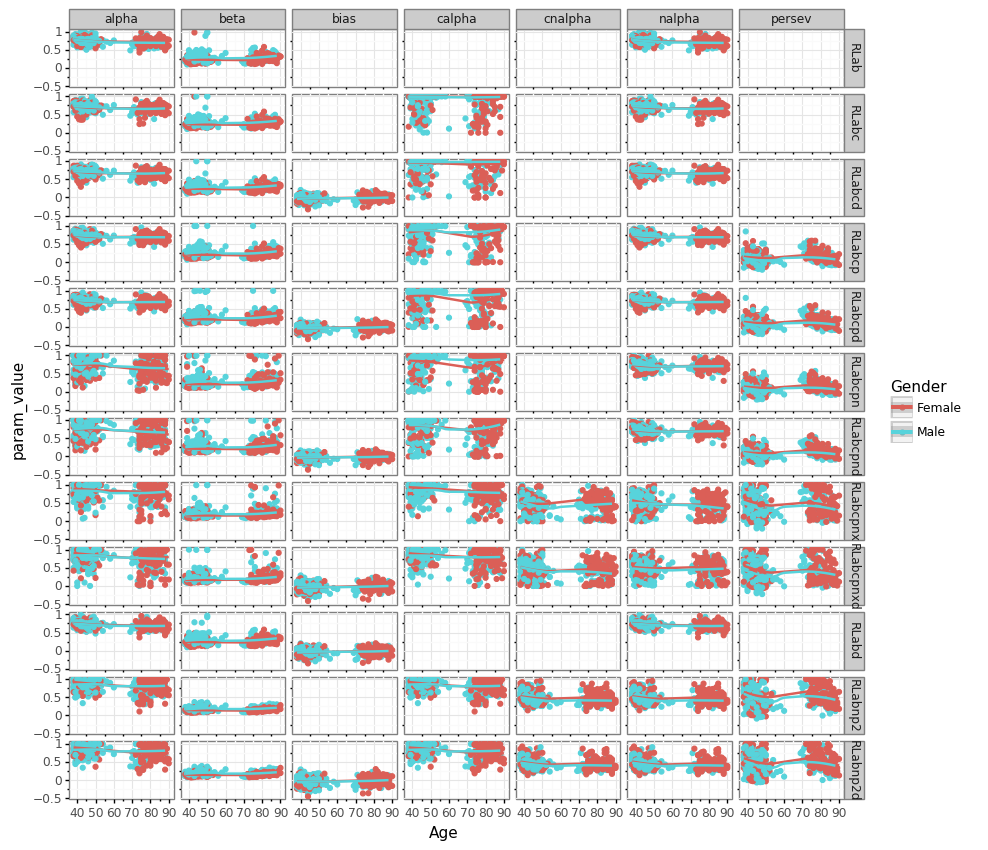

In [30]:
g = (gg.ggplot(all_params_long, gg.aes('PreciseYrs', 'param_value', color='Gender'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.geom_smooth()
 + gg.facet_grid('model~param_name')
 + gg.labs(x='Age')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsAge.png'))

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\utils.py:634: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(lst, axis=axis, ignore_index=True)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_point : Removed 2634 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anacon

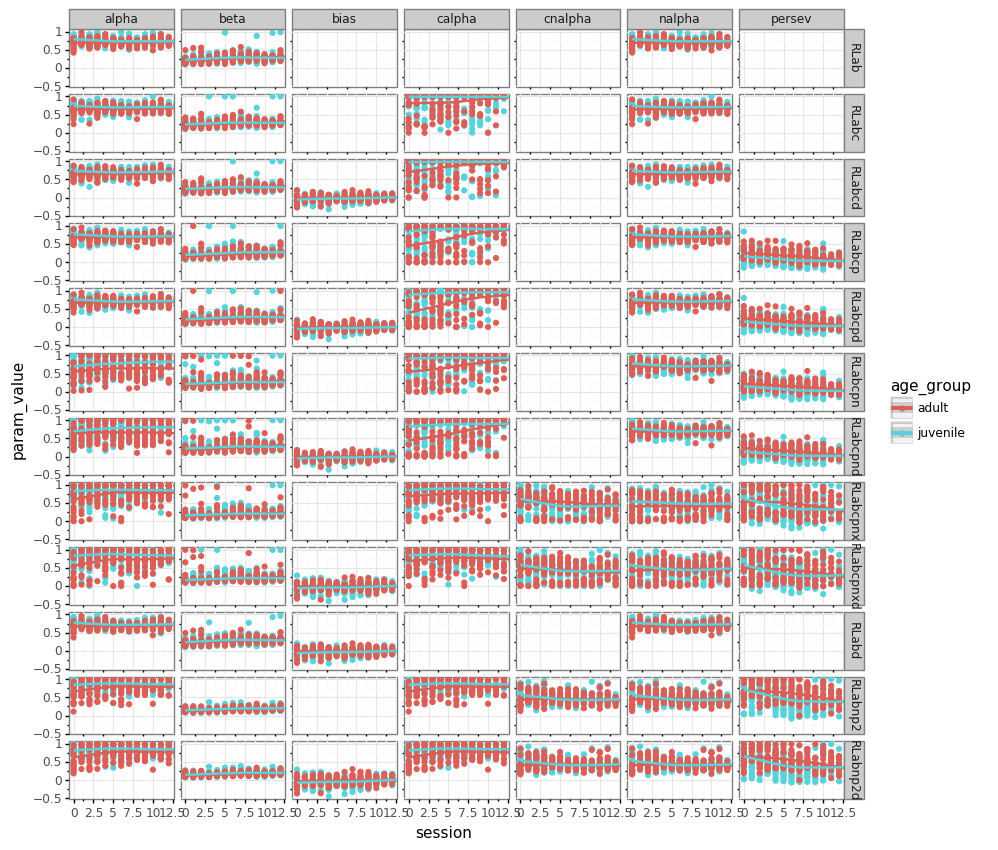

In [31]:
g = (gg.ggplot(all_params_long, gg.aes('session', 'param_value', color='age_group'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.geom_smooth()
 + gg.coord_cartesian(xlim=(0, 12))
 + gg.facet_grid('model~param_name')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsSession.png'))

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_summary : Removed 2634 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\utils.py:634: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(lst, axis=axis, ignore_index=True)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/allModelsParamsAgegroup.png
  warn('Filename: {}'.format(filename), Plotnin

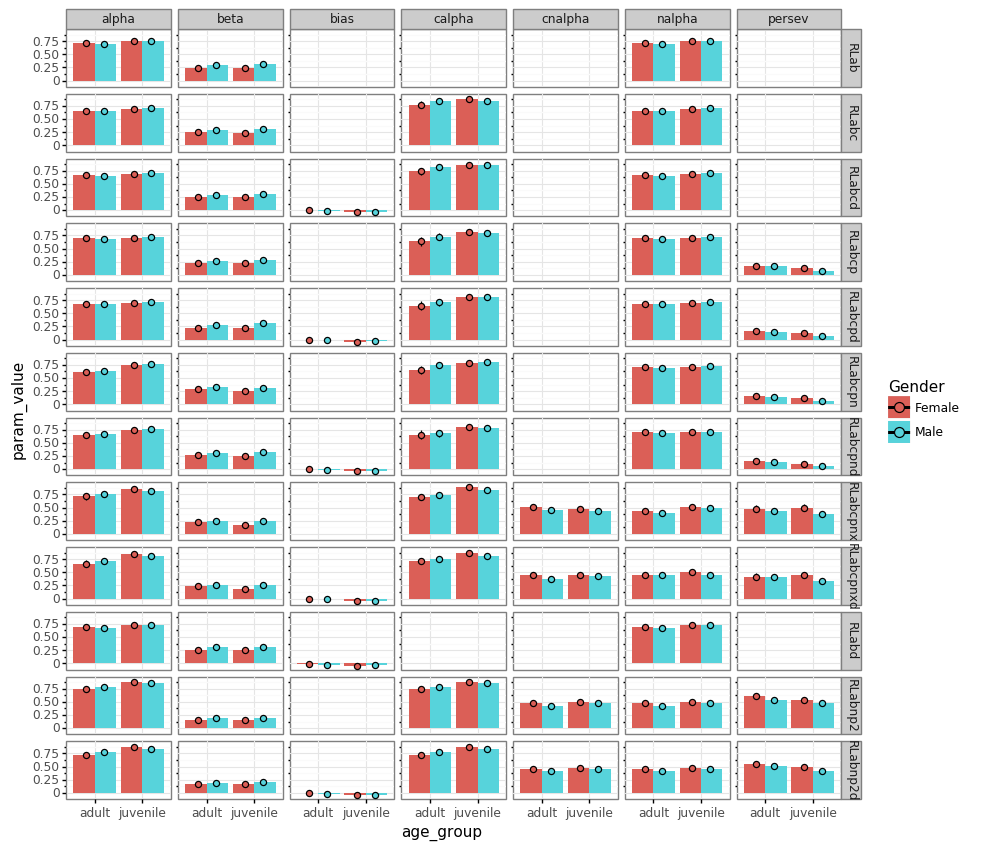

In [32]:
g = (gg.ggplot(all_params_long,
           gg.aes('age_group', 'param_value', fill='Gender'))
 + gg.stat_summary(geom='bar', position=gg.position_dodge)
 + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.75))
 + gg.theme_bw()
 + gg.facet_grid('model~param_name')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsAgegroup.png'))

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/allModelsBiasSession.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


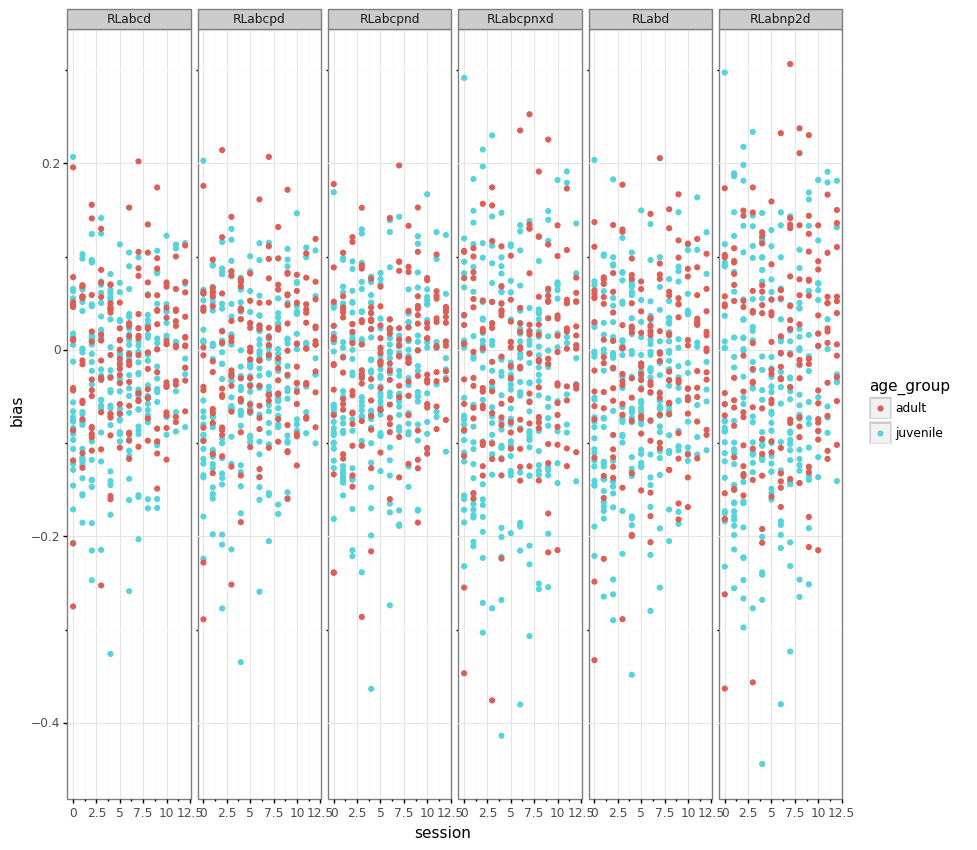

In [33]:
sub = ['d' in name for name in all_params.model]
g = (gg.ggplot(all_params[sub], gg.aes('session', 'bias', color='age_group'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.facet_grid('~model')
 + gg.coord_cartesian(xlim=(0, 12))
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsBiasSession.png'))

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/allModelsBiasSession2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


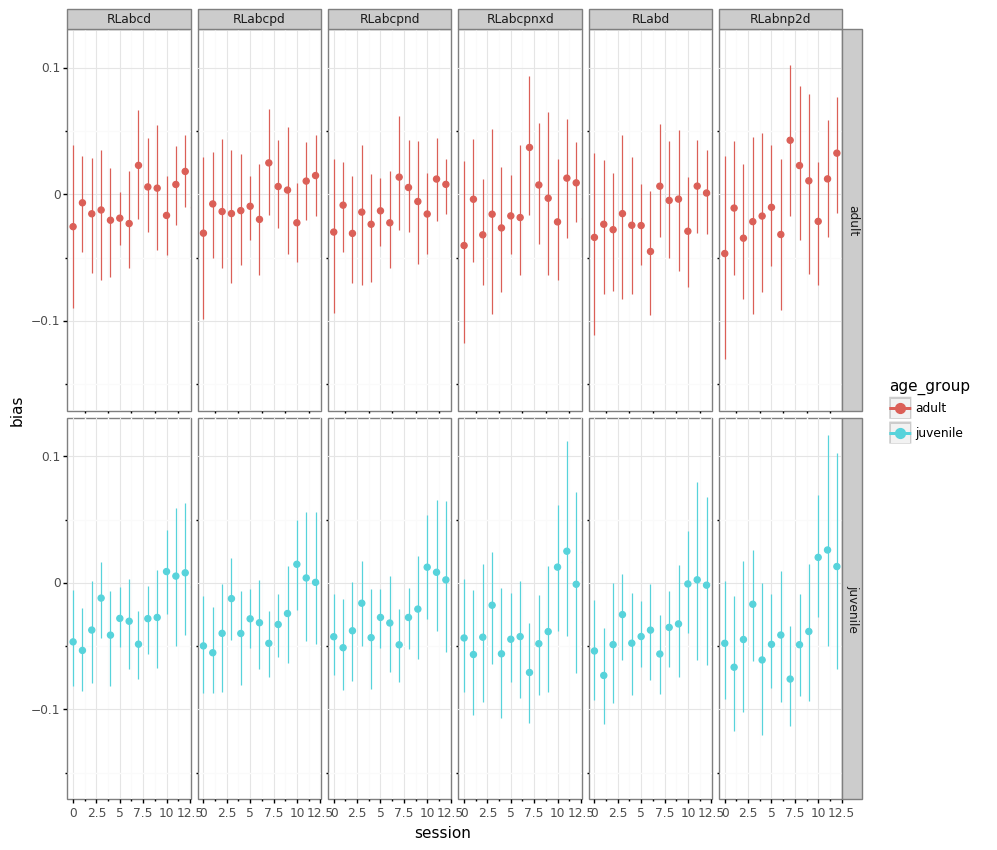

In [34]:
sub = ['d' in name for name in all_params.model]
g = (gg.ggplot(all_params[sub], gg.aes('session', 'bias', color='age_group'))
 + gg.stat_summary()
 + gg.theme_bw()
 + gg.facet_grid('age_group~model')
 + gg.coord_cartesian(xlim=(0, 12))
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsBiasSession2.png'))